In [7]:
# Import Pandas, Numpy and Scipy
import pandas as pd
import numpy as np
from scipy.stats import norm

# Import matplotlib for visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

# Set the runtime configuration (rc)
plt.style.use('dark_background')

rcParams['figure.figsize'] = 8, 6
rcParams['font.size'] = 12
rcParams['legend.fontsize'] = 'medium'
rcParams['figure.titlesize'] = 'medium'

In [8]:
# Load the CSV file
spx = pd.read_excel('SPX.xlsx', index_col=0, parse_dates=True, dayfirst=True)  

# Output first five values
spx.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [9]:
# Make sure the index datatype is in a proper datetime format
spx.index

DatetimeIndex(['1927-12-30', '1928-01-03', '1928-01-04', '1928-01-05',
               '1928-01-06', '1928-01-09', '1928-01-10', '1928-01-11',
               '1928-01-12', '1928-01-13',
               ...
               '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03',
               '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
               '2020-01-10', '2020-01-13'],
              dtype='datetime64[ns]', name='Date', length=23117, freq=None)

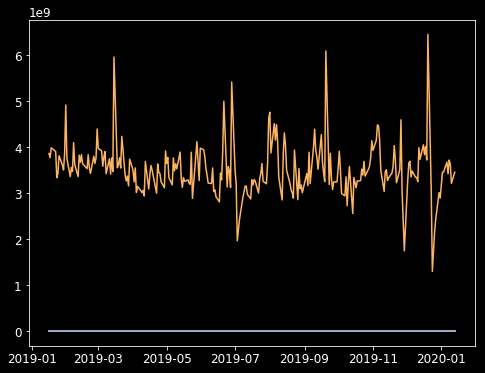

In [10]:
# Verify the datetime format
plt.plot(spx.index[-250:],spx[-250:])

Text(0.5, 0, 'Year')

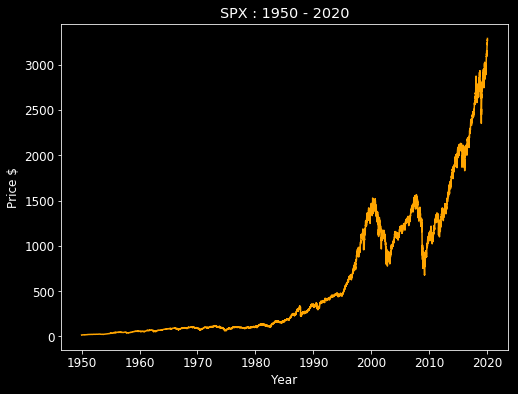

In [11]:
# Slice the DataFrame to get values from 1950
spx = spx['1950':]

# Visualize the plot to verify the data
plt.plot(spx.index, spx['Adj Close'], color='orange')
plt.title('SPX : 1950 - 2020')
plt.ylabel('Price $')
plt.xlabel('Year')

In [13]:
# Calculate returns and add it to existing DataFrame as a column
spx['Return'] = spx['Adj Close'].pct_change().fillna(0)

# Get first 5 rows
spx.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000,0.000000
1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000,0.011405
1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000,0.004748
1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000,0.002953
1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000,0.005889


In [14]:
spx['Return']

Date
1950-01-03    0.000000
1950-01-04    0.011405
1950-01-05    0.004748
1950-01-06    0.002953
1950-01-09    0.005889
1950-01-10   -0.002927
1950-01-11    0.003523
1950-01-12   -0.019310
1950-01-13   -0.005370
1950-01-16    0.002999
1950-01-17    0.008373
1950-01-18   -0.000593
1950-01-19    0.001187
1950-01-20    0.001778
1950-01-23    0.001183
1950-01-24   -0.003546
1950-01-25   -0.007117
1950-01-26   -0.000597
1950-01-27    0.005380
1950-01-30    0.011891
1950-01-31    0.001763
1950-02-01    0.000000
1950-02-02    0.010557
1950-02-03    0.003482
1950-02-06    0.001735
1950-02-07   -0.005196
1950-02-08   -0.001161
1950-02-09    0.004068
1950-02-10   -0.002315
1950-02-14   -0.010441
                ...   
2019-11-29   -0.004011
2019-12-02   -0.008631
2019-12-03   -0.006638
2019-12-04    0.006324
2019-12-05    0.001500
2019-12-06    0.009136
2019-12-09   -0.003163
2019-12-10   -0.001097
2019-12-11    0.002908
2019-12-12    0.008575
2019-12-13    0.000073
2019-12-16    0.007148
2019-1

In [15]:
# Calculate mean and sigma
mu = np.mean(spx['Return'])
sigma = np.std(spx['Return'])

print(f'Mean {mu:.6f}, Sigma {sigma:.6f}')

Mean 0.000346, Sigma 0.009600


In [16]:
# Calculate the scaled return
spx['Scaled_Return'] = spx['Return'].apply(lambda x: (x-mu)/sigma)

# Check the output
spx.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Scaled_Return
Date,,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000,0.000000,-0.036070
1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000,0.011405,1.151844
1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000,0.004748,0.458465
1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000,0.002953,0.271554
1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000,0.005889,0.577366


In [17]:
# Calculate minimum and maximum bin range
sr_min = np.min(spx['Scaled_Return'])
sr_max = np.max(spx['Scaled_Return'])

print(f'Minimum {sr_min:.6f}, Maximum {sr_max:.6f}')

Minimum -21.354692, Maximum 12.025848


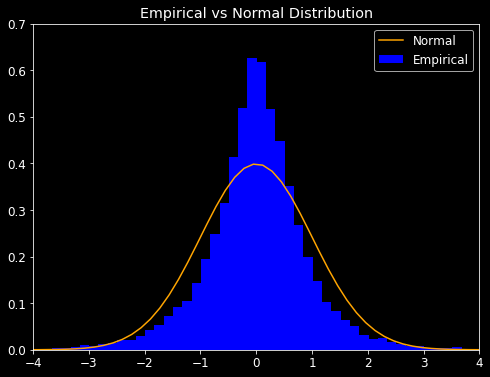

In [18]:
# Define bins
x = np.linspace(sr_min, sr_max, 200)

# Calculate normal probability density function
y = (1/np.sqrt(2*np.pi)*np.exp(-0.5*x**2)) # can also use norm.pdf(x,0,1)

# Plot histogram of scaled returns
plt.hist(spx['Scaled_Return'], bins=200, density=True, color = 'blue', label = 'Empirical', alpha=1)

# Plot norm pdf
plt.plot(x, y, color = 'orange', label = 'Normal', alpha=1)

# Set x and y axis limits
plt.xlim(-4,4)
plt.ylim(0,0.7)

# Set title
plt.title('Empirical vs Normal Distribution')

# Set legends
plt.legend();